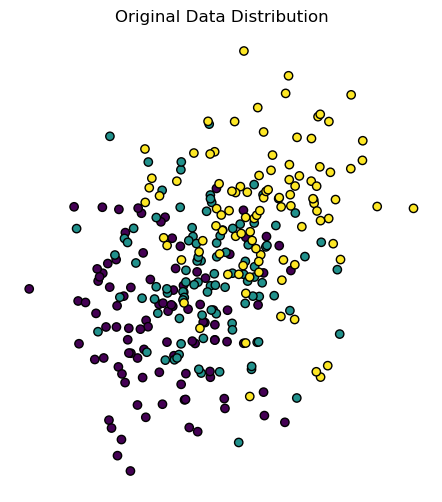

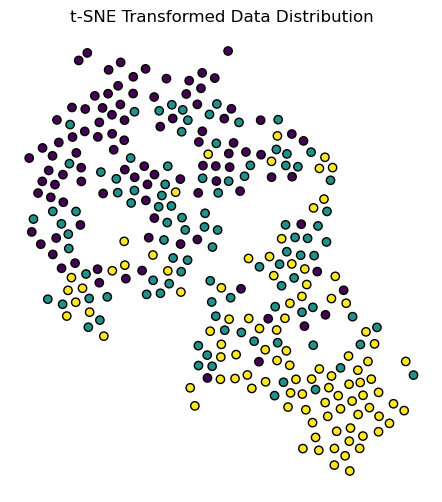

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 设置随机种子以获得可重复的结果
np.random.seed(0)

# 1. 正态分布数据生成函数
def generate_normal_fault_data(num_samples, mean, std):
    return np.random.normal(mean, std, (num_samples, 2))

# 2. 指数分布数据生成函数
def generate_exponential_fault_data(num_samples, scale):
    return np.random.exponential(scale=scale, size=(num_samples, 2))

# 3. 伽马分布数据生成函数
def generate_gamma_fault_data(num_samples, shape, scale):
    return np.random.gamma(shape=shape, scale=scale, size=(num_samples, 2))

def generate_data(group_size, mean_offset):
    # 这里使用均值偏移生成不同组的数据
    return np.random.normal(loc=[mean_offset, mean_offset], scale=1, size=(group_size, 2))

# 生成三组数据
inner_race_fault_data = generate_data(100, 0)
cage_fault_data = generate_data(100, 1)
outer_race_fault_data = generate_data(100, 2)

# 合并所有数据
X = np.vstack((inner_race_fault_data, cage_fault_data, outer_race_fault_data))

# 为t-SNE提供标签
y = np.array([0] * len(inner_race_fault_data) + 
             [1] * len(cage_fault_data) + 
             [2] * len(outer_race_fault_data))

# 绘制分类前的数据分布
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Original Data Distribution')
plt.axis('off')  # 关闭坐标轴
plt.show()

# 使用t-SNE降维
tsne = TSNE(n_components=2, learning_rate=1000, n_iter=1000, perplexity=30.0, random_state=0)
X_tsne = tsne.fit_transform(X)

# 绘制分类后的数据分布
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('t-SNE Transformed Data Distribution')
plt.axis('off')  # 关闭坐标轴
plt.show()